# Hate Crime Trends in the United States

By Kunal Mehta, Naaima Qadeer, and Amit Yavasani

# Table of contents
1. [Introduction](#introduction)
2. [Data Collection and Preprocessing](#datacollection)
    1. [Census Data](#censusdata)
    2. [Hate Crime Data](#hatecrimedata)
3. [Scatterplots](#scatterplots)
4. [Linear Regression](#linearregression)
    1. [Predict Total Hate Crime](#total)
    2. [Predict Hate Crime Rate](#rate)
5. [Conclusion](#conclusion)

# Introduction<a name="introduction"></a>

Increasing instances of hate crime in the US has been a hot topic among various new sources<sup><a href="https://apnews.com/article/hate-crimes-rise-FBI-data-ebbcadca8458aba96575da905650120d">1</a>,<a href="https://www.npr.org/2020/11/16/935439777/fbi-report-bias-motivated-killings-at-record-high-amid-nationwide-rise-in-hate-c">2</a>,<a href="https://www.bbc.com/news/world-us-canada-54968498">3</a></sup>, and as time goes on, hatred and violence throughout the world seems to be more publicized and more common. To investigate the validity of these assumption, we will analyze FBI hate crimes in the USA from 2014-2019. With this data, we will get a closer look at trends of hate crimes with various motives, including race, religion, sexual orientation, ethnicity, disability, gender, and gender identity. We will also be analyzing where the hate crimes occur most often and whether there is some sort of trend.

# Data Collection and Preprocessing<a name="datacollection"></a>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

### Census Data<a name="censusdata"></a>

For general demographic and population statistics of each state, we will use [census.gov](https://www.census.gov/quickfacts/fact). This will be valuable in our analysis when accounting for any confounding factors and for making predictive models.

In [2]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", 
          "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", 
          "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
          "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]



df = pd.read_csv('https://www.census.gov/quickfacts/fact/csv/' + states[0] + '/')

# row 62 onwards isn't data
df.drop(range(62,83), inplace=True)

# just keep data, remove columns with irrelevant info
note_cols = [col for col in df.columns if 'Note' in col]
df.drop(note_cols, 1, inplace=True)

df

,Fact,Alabama
0,"Population estimates, July 1, 2019, (V2019)","4,903,185"
1,"Population estimates base, April 1, 2010, (V2...","4,780,125"
2,"Population, percent change - April 1, 2010 (es...",2.6%
3,"Population, Census, April 1, 2010","4,779,736"
4,"Persons under 5 years, percent",6.0%
...,...,...
57,"Veteran-owned firms, 2012","41,943"
58,"Nonveteran-owned firms, 2012","316,984"
59,"Population per square mile, 2010",94.4
60,"Land area in square miles, 2010","50,645.33"


Above, we can see what sort of data is included for each state. We will continue to add every state as well as DC as columns in this dataframe.

In [3]:
# takes a while, about 15 mins on my computer because of the read_csv step
# since the .csv files aren't stored locally but rather being downloaded from census.gov
for abbr in states[1:]:
    curr_df = pd.read_csv('https://www.census.gov/quickfacts/fact/csv/' + abbr + '/')

    curr_df = curr_df.drop(range(62,83))

    note_cols = [col for col in curr_df.columns if 'Note' in col]
    curr_df = curr_df.drop(note_cols, 1)

    df[curr_df.columns.values[1]] = curr_df.iloc[:, 1]
    
df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.columns.name = 'State'

Below, we can see the final dataframe containing the census data for all states.

In [4]:
census_data = df
census_data

State,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,903,185","4,780,125",2.6%,"4,779,736",6.0%,22.2%,17.3%,51.7%,69.1%,26.8%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"731,545","710,249",3.0%,"710,231",7.0%,24.6%,12.5%,47.9%,65.3%,3.7%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"7,278,717","6,392,288",13.9%,"6,392,017",5.9%,22.5%,18.0%,50.3%,82.6%,5.2%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"3,017,804","2,916,031",3.5%,"2,915,918",6.2%,23.2%,17.4%,50.9%,79.0%,15.7%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56.0,"52,035.48","""05"""
California,"39,512,223","37,254,519",6.1%,"37,253,956",6.0%,22.5%,14.8%,50.3%,71.9%,6.5%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,758,736","5,029,319",14.5%,"5,029,196",5.8%,21.9%,14.6%,49.6%,86.9%,4.6%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,565,287","3,574,147",-0.2%,"3,574,097",5.1%,20.4%,17.7%,51.2%,79.7%,12.2%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
District of Columbia,"705,749","601,767",17.3%,"601,723",6.4%,18.2%,12.4%,52.6%,46.0%,46.0%,...,"63,408","30,237","27,064","29,983","29,521","5,070","54,217","9,856.5",61.05,"""11"""
Delaware,"973,764","897,937",8.4%,"897,934",5.6%,20.9%,19.4%,51.7%,69.2%,23.2%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"21,477,737","18,804,564",14.2%,"18,801,310",5.3%,19.7%,20.9%,51.1%,77.3%,16.9%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""


### Hate Crime Data<a name="hatecrimedata"></a>

In order to get an exact number of people being hate crimed, we need the total population in the United States. The census data gives us this information, while also giving us information on the each race percentage. From the data below, we can see that there is only population estimates from 2019 and 2010. Since we will not have an exact population estimate from 2014-2018, there will be some margin of error.

In [5]:
census_data.head(5)

State,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,903,185","4,780,125",2.6%,"4,779,736",6.0%,22.2%,17.3%,51.7%,69.1%,26.8%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"731,545","710,249",3.0%,"710,231",7.0%,24.6%,12.5%,47.9%,65.3%,3.7%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"7,278,717","6,392,288",13.9%,"6,392,017",5.9%,22.5%,18.0%,50.3%,82.6%,5.2%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"3,017,804","2,916,031",3.5%,"2,915,918",6.2%,23.2%,17.4%,50.9%,79.0%,15.7%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56.0,"52,035.48","""05"""
California,"39,512,223","37,254,519",6.1%,"37,253,956",6.0%,22.5%,14.8%,50.3%,71.9%,6.5%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


Here we are creating data frames for each year and storing them for later use. We have displayed the first 5 states of the 2014 data to get a better look. Each state gives us the total number of religion, sexual orientation, ethnicity, disability, gender, and gender identity hate crimed in a specific state. The data frames look very similar for each year, but some more data scraping is needed.

In [6]:
url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2019.csv"
hatecrime_2019 = pd.read_csv(url, index_col=0)

url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2018.csv"
hatecrime_2018 = pd.read_csv(url, index_col=0)

url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2017.csv"
hatecrime_2017 = pd.read_csv(url, index_col=0)

url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2016.csv"
hatecrime_2016 = pd.read_csv(url, index_col=0)

url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2015.csv"
hatecrime_2015 = pd.read_csv(url, index_col=0)

url = "https://raw.githubusercontent.com/amityavasani/cmsc320final/master/Hate_Crime_Incidents_2014.csv"
hatecrime_2014 = pd.read_csv(url, index_col=0)

hatecrime_2014.head(5)

,Race,Religion,Sexual Orientation,Ethnicity,Disability,Gender,Gender Identity
State,,,,,,,
Alabama,7,1,0,1,0,0,0
Alaska,5,0,1,0,0,0,0
Arizona,124,38,55,44,4,0,0
Arkansas,5,1,1,1,0,0,0
California,305,128,187,111,4,2,22


Since some of the later years grouped race and ethnicity together, we fixed the years that did not do this by totaling the two numbers together and creating one column. Next, we combined all the data frames into one column and added a column for the total hate crimes in the state and a 'year' column which will allow us to differenciate between the years. Now, out data is beautified and ready to use. 

In [7]:
#fix a few inconsistencies in the dataframes for different years
hatecrime_2015 = hatecrime_2015.rename(columns={'Race': 'Race/Ethnicity/Ancestry'})
hatecrime_2014['Race/Ethnicity/Ancestry'] = hatecrime_2014['Race'] + hatecrime_2014['Ethnicity']
hatecrime_2014 = hatecrime_2014.drop(['Race', 'Ethnicity'], axis=1)

# combine hatecrime_x dataframes into one with a year column
hatecrime_2019['Year'] = 2019
hatecrime_2018['Year'] = 2018
hatecrime_2017['Year'] = 2017
hatecrime_2016['Year'] = 2016
hatecrime_2015['Year'] = 2015
hatecrime_2014['Year'] = 2014

hc = pd.concat([hatecrime_2019, hatecrime_2018, hatecrime_2017, hatecrime_2016, hatecrime_2015, hatecrime_2014])
hc['Total'] = hc['Race/Ethnicity/Ancestry'] + hc['Religion'] + hc['Sexual Orientation'] + hc['Disability'] + hc['Gender'] + hc['Gender Identity']
hc = hc[list(hc.columns.values[:6]) + ['Total', 'Year']]

hc

,Race/Ethnicity/Ancestry,Religion,Sexual Orientation,Disability,Gender,Gender Identity,Total,Year
State,,,,,,,,
Alabama,0,0,0,0,0,0,0,2019
Alaska,7,0,4,0,0,0,11,2019
Arizona,143,36,30,3,2,3,217,2019
Arkansas,8,0,1,0,0,0,9,2019
California,524,208,235,10,7,33,1017,2019
...,...,...,...,...,...,...,...,...
Virginia,79,16,22,1,0,0,118,2014
Washington,203,50,43,3,8,1,308,2014
West Virginia,18,2,4,2,0,0,26,2014


# Scatterplots<a name="scatterplots"></a>

In order to visualize the data, we first decided to create scatterplots. Our first scatter plot shows the total amount of hate crimes throughout the United States throughout the years. Each color represents one of the categories being hate crimed. From this graph, we can see that the categoriy being hate crimed the most is race/ethnicity/ancestry. We also notice that this number has been increasing from 2013-2019. We also notice that gender identity and gender are close to 0 and this number has been fairly stable throughout the years. Sexual Orientation has also been fairly stable. Religion seems to increase slightly throughout the years. Unfortunately, it is difficult to see the exact increase in crimes by each category, so further data visualtization is necessary. 

Our second scatter plot just shows the total amount of hate crimes throughout the year, disregarding the categories. Here, we can see a large jump throughout the years, which almost looks linear. The most dramatic jump of about 17% is in 2017. From this plot, we notice a positive correlation between total hate crimes in the United States and years. 

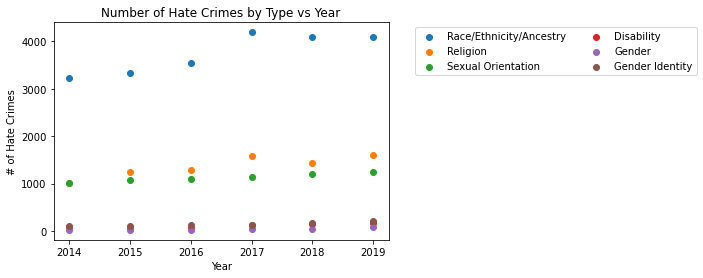

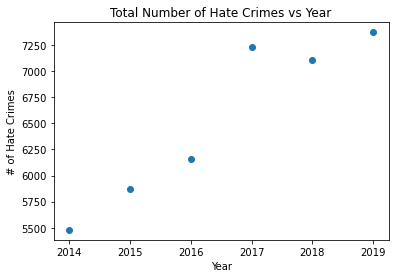

In [8]:
totals = [[],[],[],[],[],[],[]]

years = hc['Year'].unique()
for year in years:
    curr = hc.loc[hc['Year'] == year]
    totals[0].append(curr['Race/Ethnicity/Ancestry'].sum())
    totals[1].append(curr['Religion'].sum())
    totals[2].append(curr['Sexual Orientation'].sum())
    totals[3].append(curr['Disability'].sum())
    totals[4].append(curr['Gender'].sum())
    totals[5].append(curr['Gender Identity'].sum())
    totals[6].append(curr['Total'].sum())
    
plt.scatter(years, totals[0], label='Race/Ethnicity/Ancestry')
plt.scatter(years, totals[1], label='Religion')
plt.scatter(years, totals[2], label='Sexual Orientation')
plt.scatter(years, totals[3], label='Disability')
plt.scatter(years, totals[4], label='Gender')
plt.scatter(years, totals[5], label='Gender Identity')

plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1), ncol=2)
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Hate Crimes by Type vs Year")
plt.show()

plt.scatter(years, totals[6], label=years[0])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Total Number of Hate Crimes vs Year")
plt.show()

In this next scatter plot, we will be showing the total number of hate crimes each year seperated by each category. This is similar to the first scatterplot showing, except the scatter plots are separated so the axes are more appropriate for better analysis. Once again we notice that race has been hate crimed the most, followed by religion, sexual orientation, gender identity, disabilities, then gender. Here, we can see that race and religion were the main reason for the increase in 2017. In each category we notice a postive correlation between total hate crimes and years, the strongest being sexual orientation. We can also see that for gender, gender identity, and disability, the total hate crimes from 2013 nearly doubled by 2019. In the other categories, the numbers significantly increased but they did not double. 

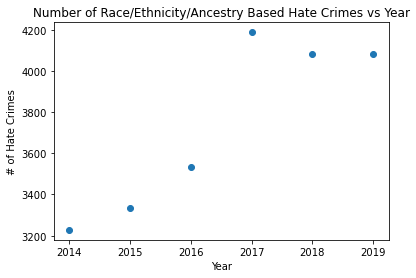

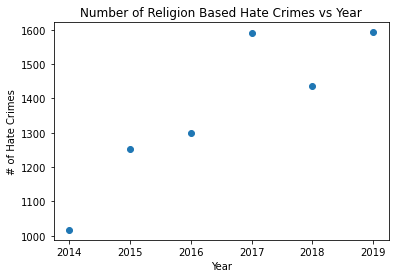

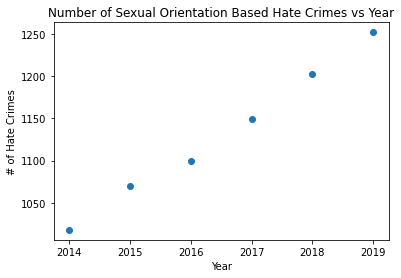

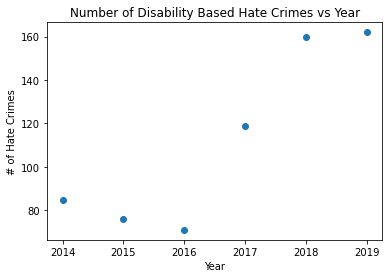

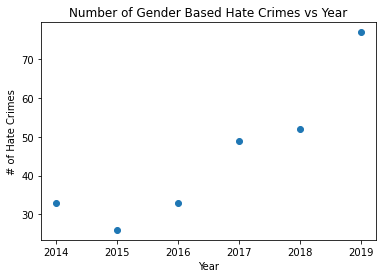

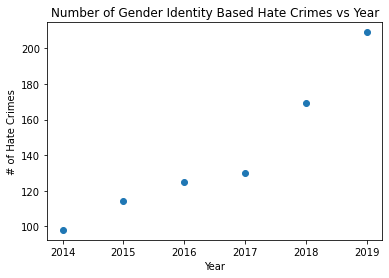

In [9]:
plt.scatter(years, totals[0])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Race/Ethnicity/Ancestry Based Hate Crimes vs Year")
plt.show()

plt.scatter(years, totals[1])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Religion Based Hate Crimes vs Year")
plt.show()

plt.scatter(years, totals[2])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Sexual Orientation Based Hate Crimes vs Year")
plt.show()

plt.scatter(years, totals[3])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Disability Based Hate Crimes vs Year")
plt.show()

plt.scatter(years, totals[4])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Gender Based Hate Crimes vs Year")
plt.show()

plt.scatter(years, totals[5])
plt.xlabel("Year")
plt.ylabel("# of Hate Crimes")
plt.title("Number of Gender Identity Based Hate Crimes vs Year")
plt.show()

# Linear Regression<a name="linearregression"></a>

### Predict Total Hate Crime<a name="total"></a>

Firstly, since we do not have an exact population estimates for 2014-2018, we will be estimating the values ourselves with some interpolation. The function defined below assumes the population for each state increases linearly based on the 2010 and 2019 values.

In [10]:
def get_estimated_population(year, state):
    est2019 = float(census_data.loc[[state]]['Population estimates, July 1, 2019,  (V2019)'][0].replace(',', ''))
    est2010 = float(census_data.loc[[state]]['Population estimates base, April 1, 2010,  (V2019)'][0].replace(',', ''))
    slope = (est2019 - est2010) / (2019 - 2010)
    
    return slope*(year - 2010) + est2010

We tested the function for Alabama in 2015 and the value seems fairly accurate. For reference, Alabama had a population of 4,903,185 in 2019 and 4,780,125 in 2010. The 2015 result is shown below, and does seem approximately in the center of these two points.

In [11]:
print('2015 Alabama Estimate: ' + str(get_estimated_population(2015, 'Alabama')))

2015 Alabama Estimate: 4848491.666666667


In order to easily access the data necessary to input data into our linear regression, we have added columns that display the estimated population for each state, depending on the year, and the percent of non-white residents in that state.

In [12]:
est_population = []
nonwhite_percent = []

for index, row in hc.iterrows():
    est_population.append(get_estimated_population(row['Year'], index))
    nonwhite_percent.append(100 - float(census_data.loc[[index]]['White alone, percent'][0].replace('%','')))
    
hc['Estimated Population'] = est_population
hc['Non-White Percent'] = nonwhite_percent
hc

,Race/Ethnicity/Ancestry,Religion,Sexual Orientation,Disability,Gender,Gender Identity,Total,Year,Estimated Population,Non-White Percent
State,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,2019,4.903185e+06,30.9
Alaska,7,0,4,0,0,0,11,2019,7.315450e+05,34.7
Arizona,143,36,30,3,2,3,217,2019,7.278717e+06,17.4
Arkansas,8,0,1,0,0,0,9,2019,3.017804e+06,21.0
California,524,208,235,10,7,33,1017,2019,3.951222e+07,28.1
...,...,...,...,...,...,...,...,...,...,...
Virginia,79,16,22,1,0,0,118,2014,8.238591e+06,30.6
Washington,203,50,43,3,8,1,308,2014,7.120252e+06,21.5
West Virginia,18,2,4,2,0,0,26,2014,1.825964e+06,6.5


We can see some trends in the dataset in the heat map below. We will choose to use year, estimated population, and non-white percent as the inputs for our regression in order to predict the total hate crimes. It seems at least esimated population will be a strong indicator of this.

<AxesSubplot:>

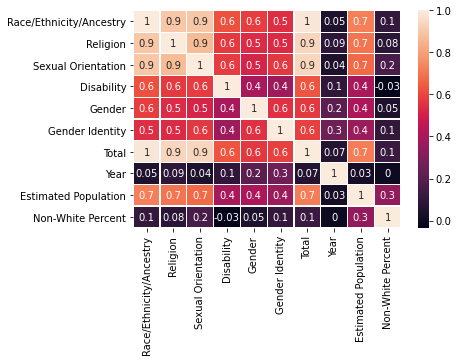

In [13]:
# this looks cool
sns.heatmap(hc.corr("spearman"), annot = True, fmt = '.1g', linewidths=.2,)

Now, we train our linear regression with the inputs and output specified above. We can see the impact of each of our inputs from the coefficients on each variable in the equation printed below.

In [14]:
X = hc[['Year', 'Estimated Population', 'Non-White Percent']]
y = hc[['Total']]

regr = LinearRegression()
regr.fit(X, y)


print("Linear model:\nTotal Hate Crimes =\n" + 
      '\t' + str(regr.coef_[0][0]) + " * Year + \n" 
      + '\t' + str(regr.coef_[0][1]) + " * Estimated Population + \n"
      + '\t' + str(regr.coef_[0][2]) + " * Non-White Percent + \n"
      + '\t' + str(regr.intercept_[0]))

Linear model:
Total Hate Crimes =
	7.172538596211083 * Year + 
	1.886217559708731e-05 * Estimated Population + 
	-0.18371835810162962 * Non-White Percent + 
	-14450.634859252568


Each year the total number of hate crimes seems to increase by 7.173. Additionally, the number increases by 1.886 for every 100,000 people. The percentage of non-white residents seems to have little impact, at 0.184 fewer hate crimes per percent increase.

Now we will be calculating the p-value in order to see how good this predicited regression is for each coefficient. Printed in the below summary, we got p-values of:
- 0.084 for the year
- 0.000 for the estimated population
- 0.739 for the non-white percent

This tells us the esimated population was an excellent indicator, the year was a decent indicator, and the non-white percent was a terrible indicator. Clearly the population in a state is relevant since there are simply more potential perpetrators and victims. The year being a decent indicator tells us that there is decent evidence to support a trend towards increasing hate crimes as the years have gone on. The non-white percentage tells us the racial diversity of a state, which is also perhaps indicative of overall diversity, does not correlate with an increase or decrease in hate crimes.

In [15]:
import statsmodels.api as sm

est = sm.OLS(y, sm.add_constant(X)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 16 May 2021   Prob (F-statistic):           9.65e-52
Time:                        08:08:48   Log-Likelihood:                -1906.1
No. Observations:                 306   AIC:                             3820.
Df Residuals:                     302   BIC:                             3835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.445e+04 

The violin plot shows the residual values of our model, meaning it shows the difference in the predicted hate crime rate for each state and the true hate crime rate. The lack of a trend in the residuals show relative reliability with our model.

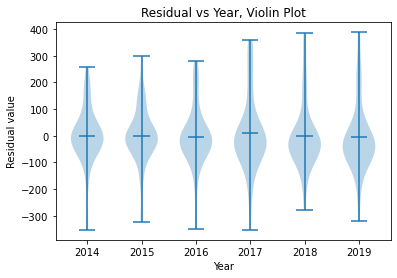

In [16]:
years = hc['Year'].unique()
residuals = []
for year in years:
    curr_year = []
    for index, row in hc.loc[hc['Year'] == year].iterrows():
        exp_value = regr.predict([[row['Year'], row['Estimated Population'], row['Non-White Percent']]])[0][0]
        curr_year.append(row['Total'] - exp_value)
    
    residuals.append(curr_year)
    

plt.violinplot(residuals, years, widths=0.6, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residual value")
plt.title("Residual vs Year, Violin Plot")
plt.show()

### Predict Hate Crime Rate (Total Hate Crimes per 100,000)<a name="rate"></a>

We define the hate crime rate as the total number of hate crimes per 100,000 residents in a state. We add another column to our dataframe for this statistic.

In [17]:
hc['Hate Crime Rate'] = hc['Total'] * 100000 / hc['Estimated Population']
hc

,Race/Ethnicity/Ancestry,Religion,Sexual Orientation,Disability,Gender,Gender Identity,Total,Year,Estimated Population,Non-White Percent,Hate Crime Rate
State,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,2019,4.903185e+06,30.9,0.000000
Alaska,7,0,4,0,0,0,11,2019,7.315450e+05,34.7,1.503667
Arizona,143,36,30,3,2,3,217,2019,7.278717e+06,17.4,2.981295
Arkansas,8,0,1,0,0,0,9,2019,3.017804e+06,21.0,0.298230
California,524,208,235,10,7,33,1017,2019,3.951222e+07,28.1,2.573887
...,...,...,...,...,...,...,...,...,...,...,...
Virginia,79,16,22,1,0,0,118,2014,8.238591e+06,30.6,1.432284
Washington,203,50,43,3,8,1,308,2014,7.120252e+06,21.5,4.325689
West Virginia,18,2,4,2,0,0,26,2014,1.825964e+06,6.5,1.423905


First, we try to see if we can observe a correlation between the year and the hate crime rate as well as the non-white percent in the scatterplots below.

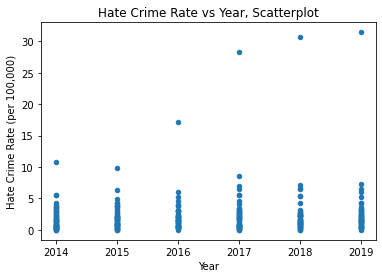

In [18]:
ax = plt.gca()
hc.plot.scatter('Year', 'Hate Crime Rate', ax=ax)
plt.title("Hate Crime Rate vs Year, Scatterplot")
plt.xlabel("Year")
plt.ylabel("Hate Crime Rate (per 100,000)")
plt.show()

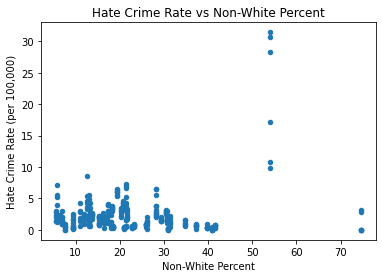

In [19]:
ax = plt.gca()
hc.plot.scatter('Non-White Percent', 'Hate Crime Rate', ax=ax)
plt.title("Hate Crime Rate vs Non-White Percent")
plt.xlabel("Non-White Percent")
plt.ylabel("Hate Crime Rate (per 100,000)")
plt.show()

There does not appear to be a particularly strong correlation in either case, but we will continue with our regression and calculate p-values for more meaningful analysis.

Below, we create our regression, using the year and non-white percent as inputs and hate crime rate as the output. See the equation in the output.

In [20]:
X = hc[['Year', 'Non-White Percent']]
y = hc[['Hate Crime Rate']]

regr = LinearRegression()
regr.fit(X, y)


print("Linear model:\nHate Crime Rate =\n" + 
      '\t' + str(regr.coef_[0][0]) + " * Year + \n" 
      + '\t' + str(regr.coef_[0][1]) + " * Non-White Percent + \n"
      + '\t' + str(regr.intercept_[0]))

Linear model:
Hate Crime Rate =
	0.18086390345380174 * Year + 
	0.048775964953438763 * Non-White Percent + 
	-363.4719656110795


We can see that for every year, the predicted hate crime rate increases by 0.181. The prediction also increases by 0.038 for each increase in percent.

The p-values are shown below. The year coefficient had a p-value of 0.104 indicating decent confidence and the non-white percent coefficient had a p-value of 0.001 indicating excellent confidence. It is surprising to see such a change in the efficacy of the non-white percentage as an indicator from our last model.

In [21]:
import statsmodels.api as sm

est = sm.OLS(y, sm.add_constant(X)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:        Hate Crime Rate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.841
Date:                Sun, 16 May 2021   Prob (F-statistic):            0.00124
Time:                        08:08:49   Log-Likelihood:                -799.35
No. Observations:                 306   AIC:                             1605.
Df Residuals:                     303   BIC:                             1616.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -363.4720    223.70

The violin plot shows the residual values of our model, meaning it shows the difference in the predicted hate crime rate for each state and the true hate crime rate. The clearly skewed residuals show this model may not be as reliable as the previous one.

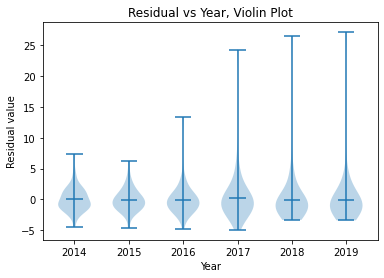

In [22]:
years = hc['Year'].unique()
residuals = []
for year in years:
    curr_year = []
    for index, row in hc.loc[hc['Year'] == year].iterrows():
        exp_value = regr.predict([[row['Year'], row['Non-White Percent']]])[0][0]
        curr_year.append(row['Hate Crime Rate'] - exp_value)
    
    residuals.append(curr_year)
    

plt.violinplot(residuals, years, widths=0.6, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residual value")
plt.title("Residual vs Year, Violin Plot")
plt.show()

# Conclusion<a name="conclusion"></a>

Our models have predicted total hate crime and the hate crime rate in each state using the current year, interpolated population data, and the percent of non-white residents. With various statistical analysis methods, we have shown a correlation between many of these variables. Unforunately, hate crimes in the United States have certainly increased from 2014 to 2019, and we hope to see a reversal of this trend in the near future.